<a href="https://colab.research.google.com/github/ranaamr22/ML-and-Deep-Learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(x,y):
    admitted=x[np.argwhere(y==1)]
    rejected=x[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected],s=25,color='blue',edgecolor='k')
    plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted],s=25,color='red',edgecolor='k')

def display(m,b,color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x=np.arrange(-10,10,0.1)
    plt.plot(x,m*x+b,color)

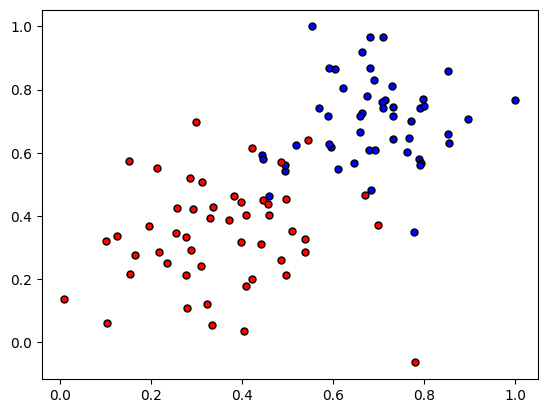

In [8]:
data = pd.read_csv('data.csv', header=None)
X=np.array(data[[0,1]])
y=np.array(data[2])
plot_points(X,y)
plt.show()


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def output_formula(features,weights,bias):
    return sigmoid(np.dot(features,weights)+bias)

def error_formula(y, output):
    return -(y*np.log(output))-((1-y)*np.log(1-output))

def update_weights(x, y, weights, bias, learnrate):
    d_error=y-output_formula(x,weights,bias)
    weights += learnrate*d_error*x
    bias +=learnrate*d_error
    return weights,bias

In [10]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4


AttributeError: ignored

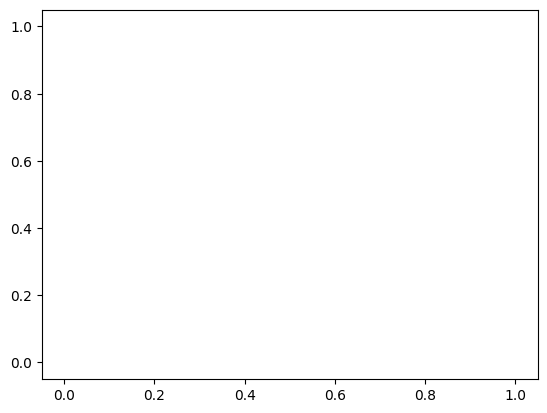

In [11]:
train(X,y,epochs,learnrate,True)